In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sns

In [2]:
data = pd.read_excel('TIP_DATA.xlsx')

In [3]:
data.head()

,ID,Visit frequency,Pay Cash or Card,Age Range,Tip habit,Tip amount,Tip Cash or Card,Confident tip reaches server?,Would use app if available?
0,1,Weekly,Card,+51,Always,0.05,Cash,Unsure,Yes
1,2,Weekly,Card,18-30,Sometimes,2,Cash,Slightly unsure,Yes
2,3,Weekly,Card,18-30,Often,2,Cash,Unsure,Yes
3,4,Weekly,Card,18-30,Sometimes,0.1,Add to the check,Slightly unsure,Yes
4,5,Weekly,Card,+51,Always,0.1,Add to the check,Confident,Yes


In [4]:
data.shape

(52, 9)

In [5]:
data.head(52)

,ID,Visit frequency,Pay Cash or Card,Age Range,Tip habit,Tip amount,Tip Cash or Card,Confident tip reaches server?,Would use app if available?
0,1,Weekly,Card,+51,Always,0.05,Cash,Unsure,Yes
1,2,Weekly,Card,18-30,Sometimes,2,Cash,Slightly unsure,Yes
2,3,Weekly,Card,18-30,Often,2,Cash,Unsure,Yes
3,4,Weekly,Card,18-30,Sometimes,0.1,Add to the check,Slightly unsure,Yes
4,5,Weekly,Card,+51,Always,0.1,Add to the check,Confident,Yes
5,6,Weekly,Card,18-30,Sometimes,0.05,Cash,Not confident at all,Unsure
6,7,Monthly,Card,+51,Always,0.05,Cash,Unsure,No
7,8,Monthly,Card,31-50,Often,1,Cash,Confident,Yes
8,9,Weekly,Card,31-50,Always,0.1,Add to the check,Very confident,Unsure
9,10,Daily,Card,18-30,Sometimes,0.05,Add to the check,Confident,Yes


# Relationship between age range and tendency to use the app

In [6]:
data['Use app'] = data['Would use app if available?'].replace({'Yes': 1, 'Unsure': 0, 'No': 0})

age_app_data = pd.crosstab(data['Age Range'], data['Use app'])

chi2_stat, p_value_3, _, _ = st.chi2_contingency(age_app_data)

chi2_stat, p_value_3

<ipython-input-6-b840275d2684>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Use app'] = data['Would use app if available?'].replace({'Yes': 1, 'Unsure': 0, 'No': 0})


(1.4896214896214897, 0.4748241543721341)

There is not enough evidence to reject the null hypothesis, indicating that no significant difference is observed in the tendency to use the app across different age groups

In [7]:
app_use_counts = data['Would use app if available?'].value_counts(normalize=True) * 100
app_use_counts

,proportion
Would use app if available?,
Yes,75.000000
Unsure,17.307692
No,7.692308


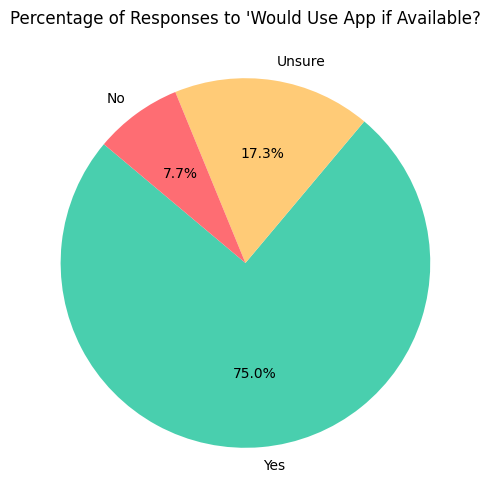

In [8]:
labels = app_use_counts.index
sizes = app_use_counts.values
colors = ['#49CFAE', '#FFCB77', '#FE6D73']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Percentage of Responses to 'Would Use App if Available?")
plt.show()

Text(0, 0.5, 'Count')

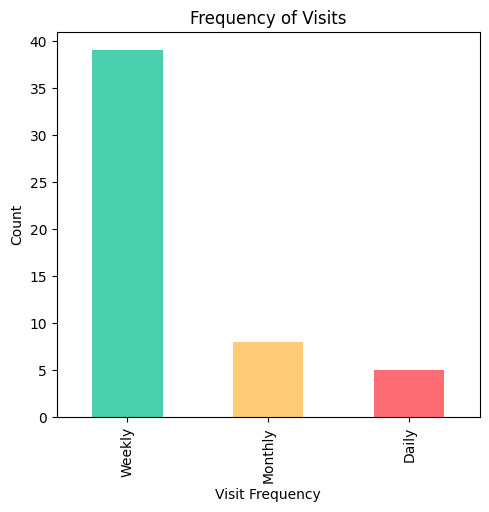

In [9]:
visit_frequency_counts = data['Visit frequency'].value_counts()
pay_method_counts = data['Pay Cash or Card'].value_counts()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
visit_frequency_counts.plot(kind='bar', color=['#49CFAE', '#FFCB77', '#FE6D73'])
plt.title("Frequency of Visits")
plt.xlabel("Visit Frequency")
plt.ylabel("Count")

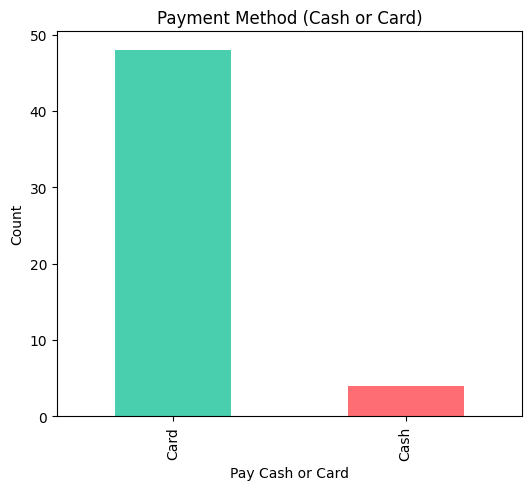

In [10]:
plt.figure(figsize=(6, 5))
pay_method_counts.plot(kind='bar', color=['#49CFAE', '#FE6D73'])
plt.title("Payment Method (Cash or Card)")
plt.ylabel("Count")
plt.show()

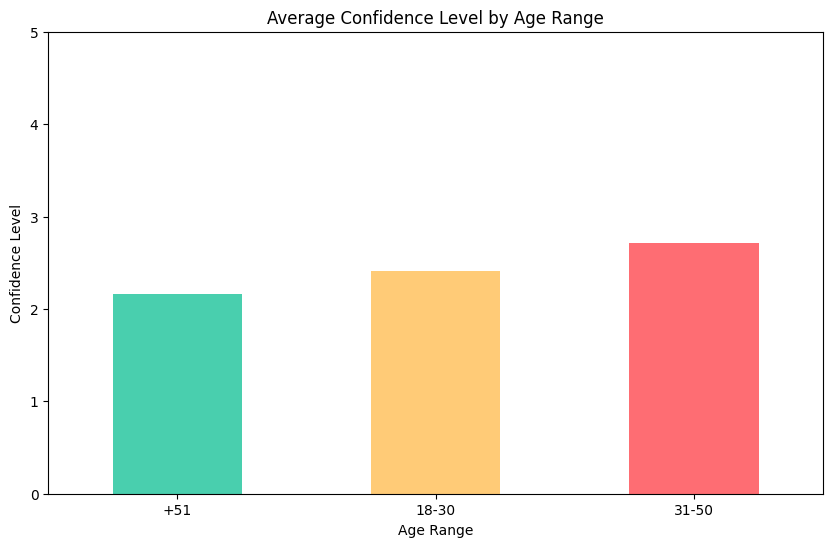

In [11]:
confidence_map = {
    'Very confident': 5,
    'Confident': 4,
    'Slightly unsure': 3,
    'Unsure': 2,
    'Not confident at all': 1}

data['Confidence level'] = data['Confident tip reaches server?'].map(confidence_map)

confidence_by_age = data.groupby('Age Range')['Confidence level'].mean()

plt.figure(figsize=(10, 6))
confidence_by_age.plot(kind='bar', color=['#49CFAE', '#FFCB77', '#FE6D73'])
plt.title("Average Confidence Level by Age Range")
plt.xlabel("Age Range")
plt.ylabel("Confidence Level")
plt.ylim(0, 5)
plt.xticks(rotation=0)
plt.show()

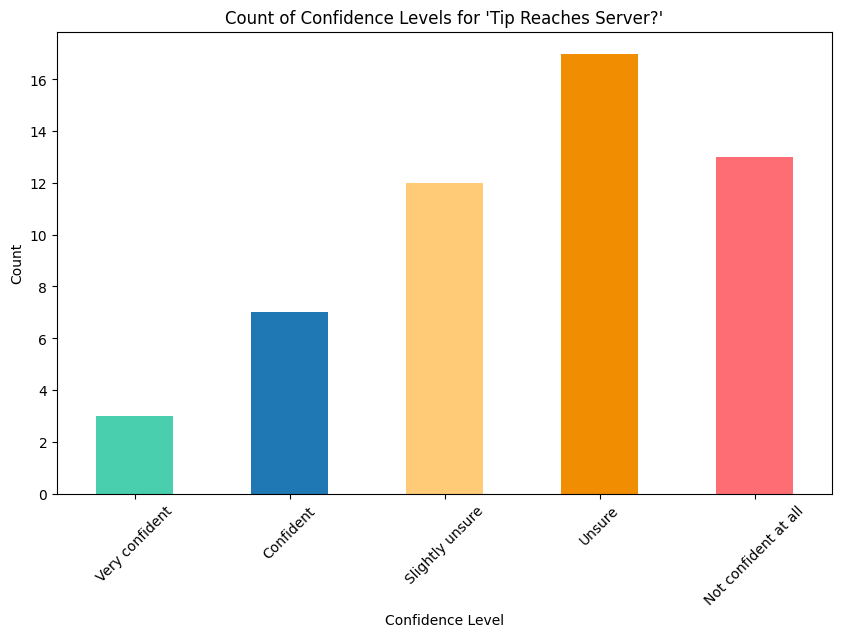

In [12]:
confidence_order = ['Very confident', 'Confident', 'Slightly unsure', 'Unsure', 'Not confident at all']
confidence_counts = data['Confident tip reaches server?'].value_counts().reindex(confidence_order)
plt.figure(figsize=(10, 6))
confidence_counts.plot(kind='bar', color=['#49CFAE', '#1f77b4', '#FFCB77', '#F18D00', '#FE6D73'])
plt.title("Count of Confidence Levels for 'Tip Reaches Server?'")
plt.xlabel("Confidence Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

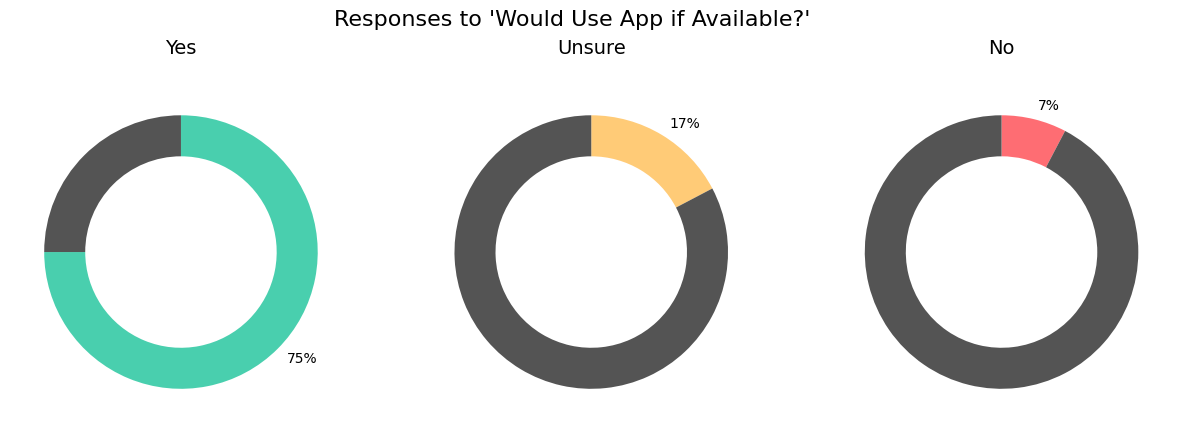

In [13]:
app_use_counts = data['Would use app if available?'].value_counts(normalize=True) * 100

colors = {'Yes': '#49CFAE', 'Unsure': '#FFCB77', 'No': '#FE6D73'}


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, (response, pct) in enumerate(app_use_counts.items()):
    sizes = [pct, 100 - pct]
    axes[i].pie(
        sizes,
        labels=[f"{int(pct)}%", ""],
        colors=[colors[response], '#545454'],
        startangle=90,
        counterclock=False,
        wedgeprops=dict(width=0.3)
    )

    axes[i].set_title(response, fontsize=14, pad=20)

plt.suptitle("Responses to 'Would Use App if Available?'", fontsize=16)
plt.show()

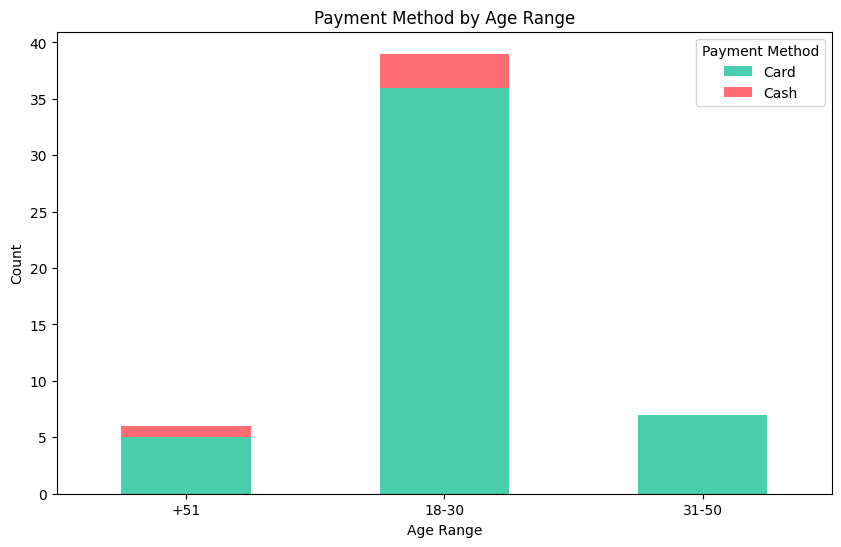

In [28]:
age_payment_counts = pd.crosstab(data['Age Range'], data['Pay Cash or Card'])

age_payment_counts.plot(kind='bar', stacked=True, color=['#49CFAE', '#FE6D73'], figsize=(10, 6))
plt.title("Payment Method by Age Range")
plt.xlabel("Age Range")
plt.ylabel("Count")
plt.legend(title="Payment Method", labels=['Card', 'Cash'], loc='upper right')
plt.xticks(rotation=0)
plt.show()

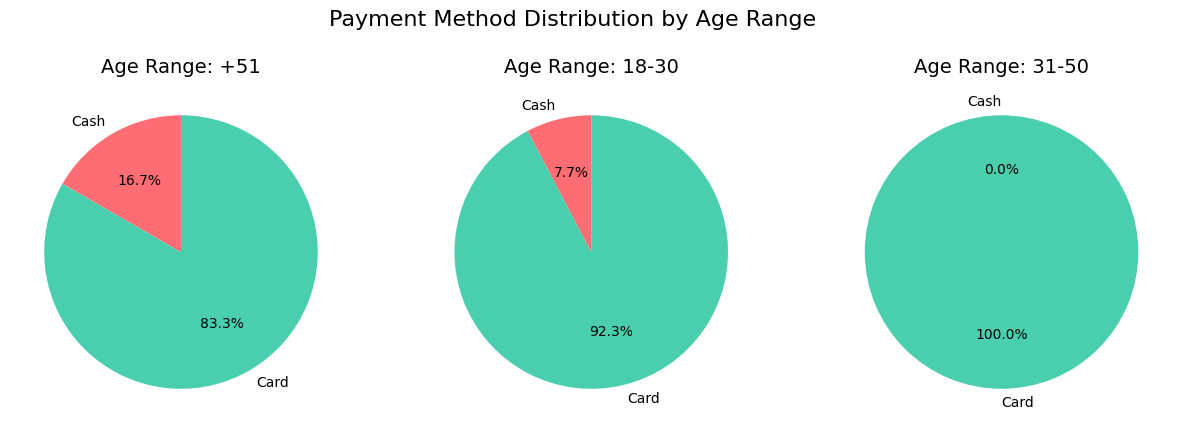

In [15]:
age_payment_counts_pie = pd.crosstab(data['Age Range'], data['Pay Cash or Card'])

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
colors = ['#49CFAE', '#FE6D73']

for i, age_range in enumerate(age_payment_counts_pie.index):
    sizes = age_payment_counts_pie.loc[age_range]
    axes[i].pie(sizes, labels=sizes.index, autopct='%1.1f%%', startangle=90, colors=colors, counterclock=False)
    axes[i].set_title(f"Age Range: {age_range}", fontsize=14)

plt.suptitle("Payment Method Distribution by Age Range", fontsize=16)
plt.show()

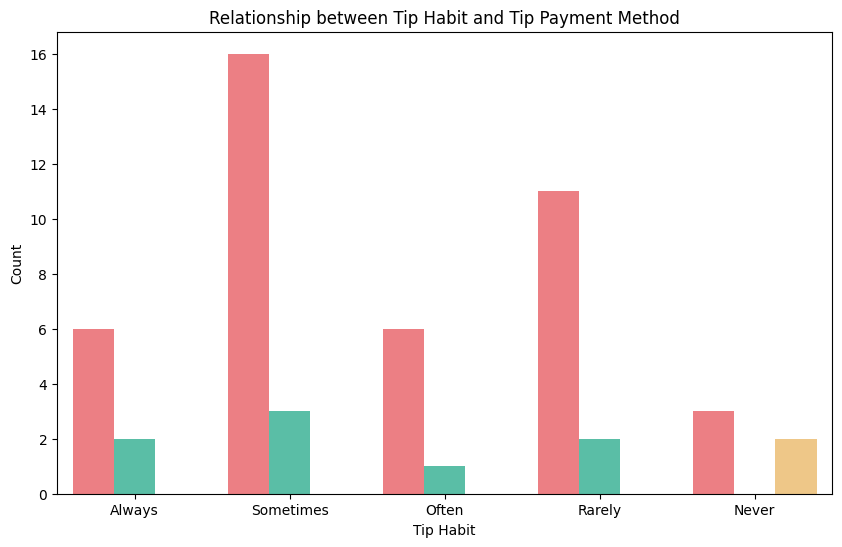

In [27]:
custom_palette = {'Cash': '#FE6D73', 'Add to the check': '#49CFAE', 'Other':'#FFCB77' }
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Tip habit', hue='Tip Cash or Card', palette=custom_palette)
plt.title('Relationship between Tip Habit and Tip Payment Method')#49CFAE #FFCB77
plt.xlabel('Tip Habit')
plt.legend([],[], frameon=False)
plt.ylabel('Count')
plt.show()

<ipython-input-38-fd0dc09a3e6e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tip_types, y=tip_counts, palette=['#FFCB77', '#49CFAE'])


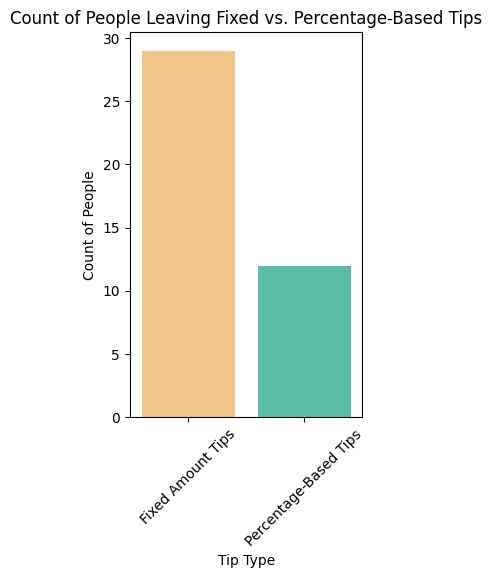

In [38]:
data['Tip amount'] = pd.to_numeric(data['Tip amount'].astype(str).str.replace('%', ''), errors='coerce')

data['Tip Percentage'] = data['Tip amount'].apply(lambda x: x if x in [0.05, 0.1, 0.2] else None)
data['Tip Fixed Amount'] = data['Tip amount'].apply(lambda x: x if x in [1, 2] else None)
fixed_tips_count = data['Tip Fixed Amount'].notnull().sum()
percentage_tips_count = data['Tip Percentage'].notnull().sum()
tip_types = ['Fixed Amount Tips', 'Percentage-Based Tips']
tip_counts = [fixed_tips_count, percentage_tips_count]

plt.figure(figsize=(3, 5))
sns.barplot(x=tip_types, y=tip_counts, palette=['#FFCB77', '#49CFAE'])
plt.title('Count of People Leaving Fixed vs. Percentage-Based Tips')
plt.xlabel('Tip Type')
plt.ylabel('Count of People')
plt.xticks(rotation=45)
plt.show()

In [18]:
age_tip_habit_data = data[['Age Range', 'Tip habit']].dropna()
contingency_table_age_tip = pd.crosstab(age_tip_habit_data['Age Range'], age_tip_habit_data['Tip habit'])
chi2_stat, p_val_chi, dof, expected = st.chi2_contingency(contingency_table_age_tip)
print("Estadístico Chi-cuadrado:", chi2_stat)
print("Valor p:", p_val_chi)
print("Grados de libertad:", dof)
print("Frecuencias esperadas:\n", expected)

Estadístico Chi-cuadrado: 43.25864110826517
Valor p: 7.851996247073307e-07
Grados de libertad: 8
Frecuencias esperadas:
 [[ 0.92307692  0.57692308  0.80769231  1.5         2.19230769]
 [ 6.          3.75        5.25        9.75       14.25      ]
 [ 1.07692308  0.67307692  0.94230769  1.75        2.55769231]]


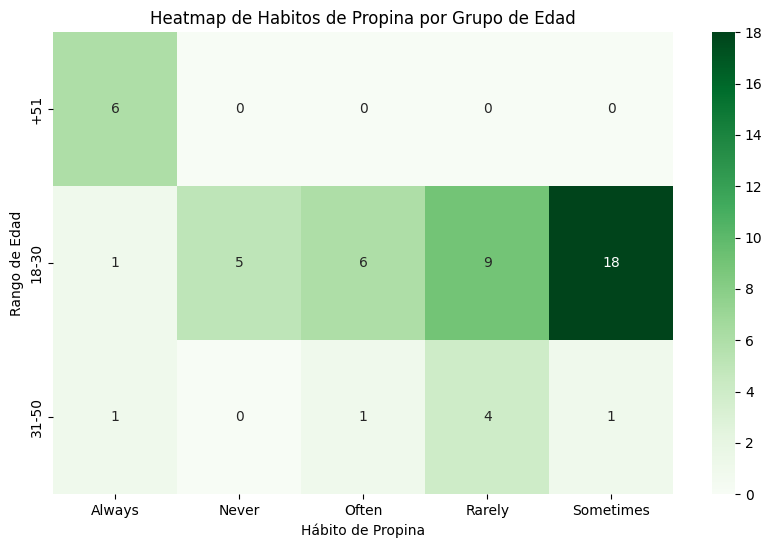

In [19]:
contingency_table_age_tip = pd.crosstab(age_tip_habit_data['Age Range'], age_tip_habit_data['Tip habit'])
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table_age_tip, annot=True, fmt='d', cmap='Greens', cbar=True)

plt.title('Heatmap de Habitos de Propina por Grupo de Edad')
plt.xlabel('Hábito de Propina')
plt.ylabel('Rango de Edad')
plt.show()